# Algoritmo de detección de circulos en imágenes

In [176]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas
from PIL import Image
#Import math Library
import math

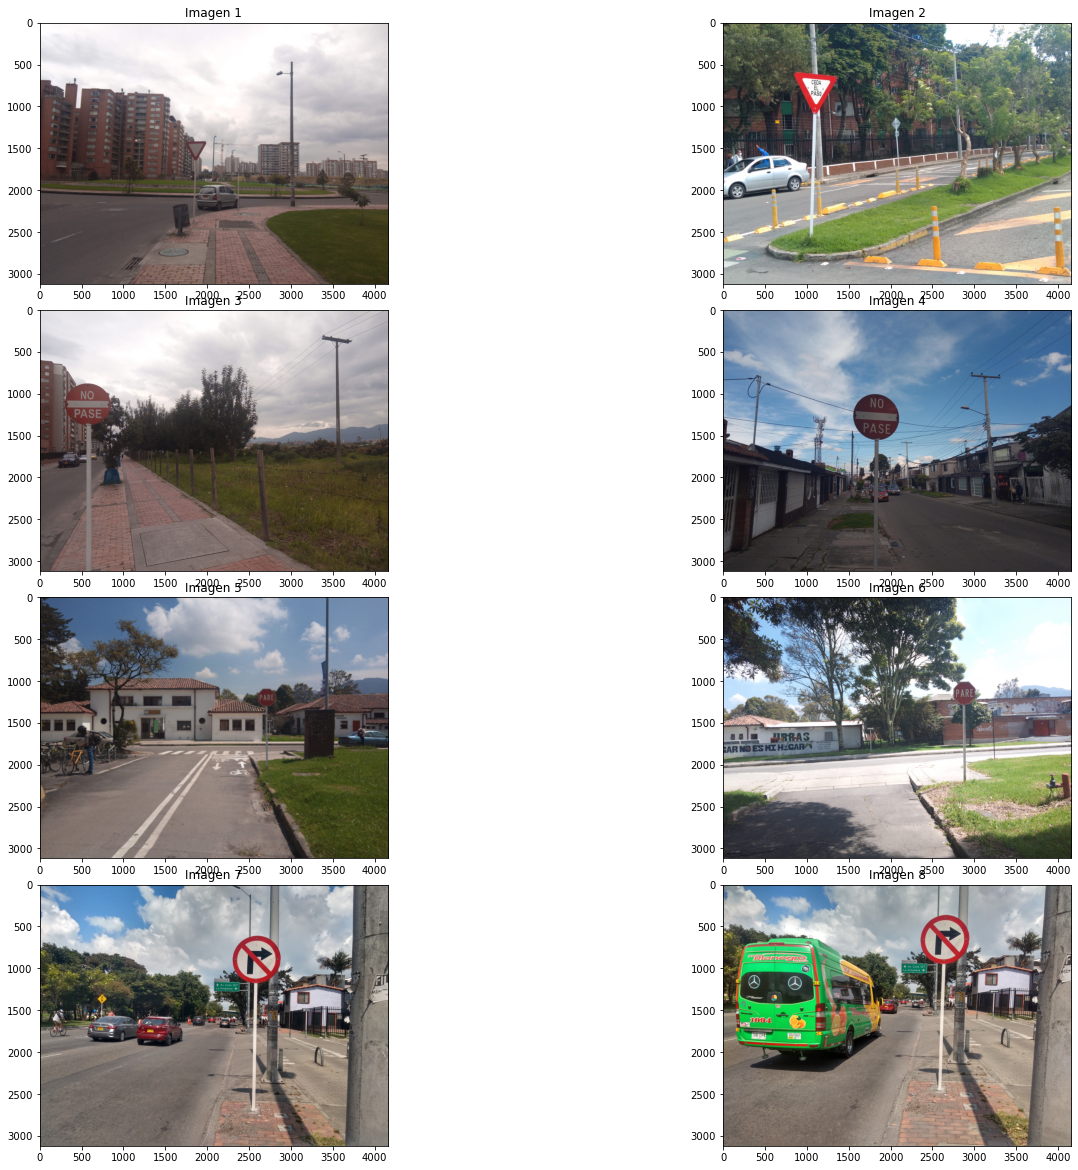

In [2]:
#lectura de las imágenes
ima1=cv2.imread("img/Cedapaso1.jpg")
ima2=cv2.imread("img/Cedapaso2.jpg")
ima3=cv2.imread("img/Nopase1.jpg")
ima4=cv2.imread("img/Nopase2.jpg")
ima5=cv2.imread("img/Pare1.jpg")
ima6=cv2.imread("img/Pare2.jpg")
ima7=cv2.imread("img/Prohibidogiroder1.jpg")
ima8=cv2.imread("img/Prohibidogiroder2.jpg")
ima9=cv2.imread("img/ima9.jpg")
ima10=cv2.imread("img/ima10.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
ima7=cv2.cvtColor(ima7,cv2.COLOR_BGR2RGB)
ima8=cv2.cvtColor(ima8,cv2.COLOR_BGR2RGB)
ima9=cv2.cvtColor(ima9,cv2.COLOR_BGR2RGB)
ima10=cv2.cvtColor(ima10,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(4,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(4,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(4,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(4,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(4,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplot(4,2,7);plt.imshow(ima7),plt.title('Imagen 7')
plt.subplot(4,2,8);plt.imshow(ima8),plt.title('Imagen 8')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

# Ubralisación HSV

In [3]:
def umbral_hsv_rojo(imagen):
    redBajo1 = np.array([0,85,10],np.uint8) 
    redAlto1 = np.array([8,255,255],np.uint8)
    redBajo2 = np.array([165,85,10],np.uint8) 
    redAlto2 = np.array([180,255,255],np.uint8) 
    img_hsv = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    maskRed1 = cv2.inRange(img_hsv, redBajo1, redAlto1)
    maskRed2 = cv2.inRange(img_hsv, redBajo2, redAlto2)
    maskRed = cv2.add(maskRed1,maskRed2)
    #res= cv2.bitwise_and(imagen,imagen,maskRed=maskRed)
    plt.figure();
    plt.imshow(imagen),plt.xticks([]), plt.yticks([])
    plt.figure();
    plt.subplot(1,2,1);plt.imshow(maskRed, cmap='gray'),plt.title('1'),plt.xticks([]), plt.yticks([])
    #plt.subplot(1,2,2);plt.imshow(res),plt.title('2'),plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    return maskRed

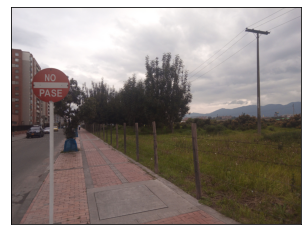

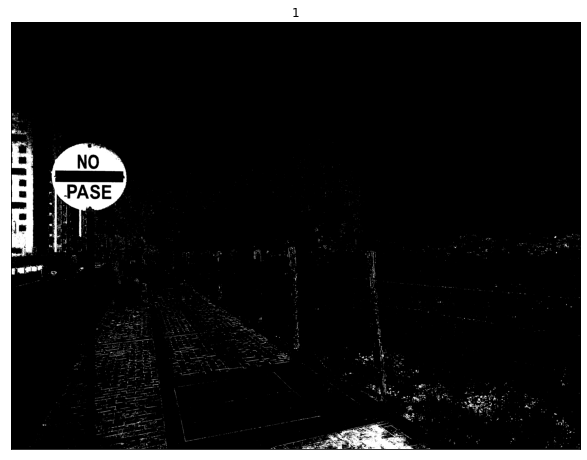

In [196]:
ima=ima3.copy()
ima_umb=umbral_hsv_rojo(ima)
plt.imshow(ima_umb,cmap="gray")

## Llenado de Señales

In [197]:
def llenado(imagen):
    
    im_floodfill = imagen.copy()
    h, w = imagen.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

     # Invert floodfilled image

    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.

    im_out = imagen | im_floodfill_inv
    return im_out

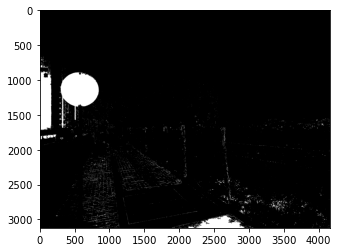

In [198]:
ima_llenado=llenado(ima_umb)
plt.imshow(ima_llenado, cmap="gray")

# Operaciones morfológicas

In [199]:
def erosion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.erode(ima,kernel)
    return ima

In [200]:
def dilatacion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.dilate(ima,kernel,n)
    return ima

In [201]:
def apertura(imagen,a,b,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima= cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)
    return ima

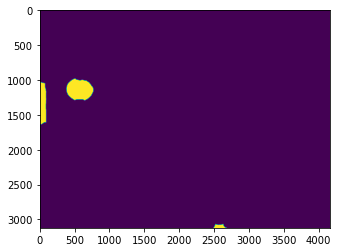

In [202]:
ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
plt.imshow(ima_erosion)

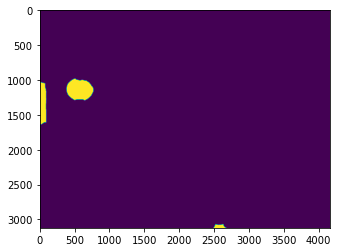

In [203]:
ima_apertura=apertura(ima_erosion,10,10,"elipse")
plt.imshow(ima_apertura)

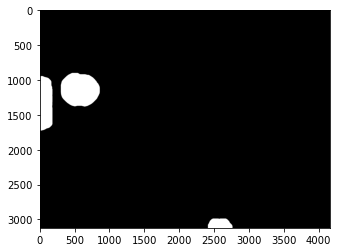

In [204]:
ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
plt.imshow(ima_dilatacion,cmap="gray")

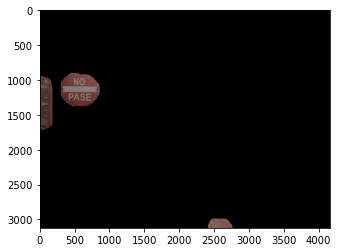

In [205]:
ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
plt.imshow(ima_final)

# Clasificador

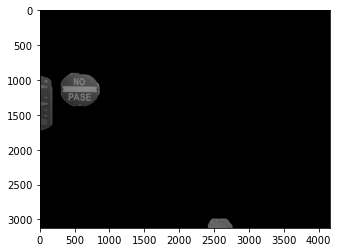

In [206]:
ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
plt.imshow(ima_bw,cmap="gray")

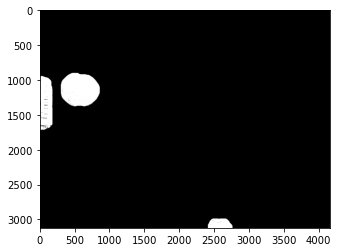

In [207]:
ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap="gray")

In [209]:
def extraccion_ROI(imagen):
    imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    ima=imagen
    ima_umb=umbral_hsv_rojo(ima)
    ima_llenado=llenado(ima_umb)
    ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
    ima_apertura=apertura(ima_erosion,10,10,"elipse")
    ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
    ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
    ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure()
    plt.subplot(4,2,1),plt.imshow(ima)
    plt.subplot(4,2,2),plt.imshow(ima_umb)
    plt.subplot(4,2,3),plt.imshow(ima_llenado)
    plt.subplot(4,2,4),plt.imshow(ima_erosion)
    plt.subplot(4,2,5),plt.imshow(ima_apertura)
    plt.subplot(4,2,6),plt.imshow(ima_dilatacion)
    plt.subplot(4,2,7),plt.imshow(ima_final)
    plt.subplot(4,2,8),plt.imshow(ima_bw)
    plt.subplot(5,2,9),plt.imshow(th1)
    return th1

## Momentos de Hu

In [210]:
moments = cv2.moments(th1)
huMoments = cv2.HuMoments(moments)

In [211]:
huMoments

array([[ 9.09176791e-03],
       [ 6.13200172e-05],
       [ 3.55183852e-06],
       [ 3.29315275e-06],
       [ 1.12606376e-11],
       [ 2.57262342e-08],
       [-2.18091472e-13]])

In [212]:
# Log scale hu moments
for i in range(7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * np.log(np.abs(huMoments[i]))


In [213]:
huMoments

array([[  4.7003859 ],
       [  9.69940422],
       [ 12.54804519],
       [ 12.62366517],
       [ 25.20970787],
       [ 17.47575458],
       [-29.15386182]])

## Detección de Blobs en las imágenes

### Detección de contornos

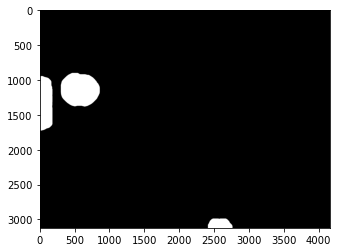

In [214]:
plt.imshow(ima_dilatacion,cmap="gray")

area del contorno0= 789.0
area del contorno1= 1324.0
area del contorno2= 216969.0


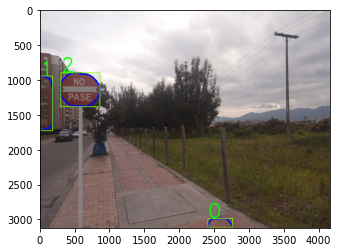

In [244]:
ima_contornos=ima.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
edges = cv2.morphologyEx(ima_dilatacion, cv2.MORPH_GRADIENT, kernel)
contours, hierarchy = cv2.findContours(edges , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    area=str(cv2.contourArea(contours[i]))
    cv2.drawContours (ima_contornos, contours, i, (0, 0, 255), 20)
    cv2.rectangle(ima_contornos,(x,y),(x+w,y+h),(120,255,0),10)
    cv2.putText(ima_contornos,str(i),(x,y-10),2,10,(0,255,0),10)
    print("area del contorno"+str(i)+"= "+area)
    
plt.imshow(ima_contornos)

### Extracción de características a partir de los contornos

In [259]:
for i in range(len(contours)):
    #Area del contorno
    area=cv2.contourArea(contours[i])
    #Longitud del contorno
    long=cv2.arcLength(contours[i],True)
    #Posición del centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")

area del contorno 0= 789.0
Perímetro del contorno 0= 1081.234625339508
Posición del Centroide 0= (2585,3023 )
Redondez del contorno 0= 0.008480998319117862
Compacidad del contorno 0= 1481.7088910431767

area del contorno 1= 1324.0
Perímetro del contorno 1= 2085.460022687912
Posición del Centroide 1= (138,1336 )
Redondez del contorno 1= 0.003825552012615908
Compacidad del contorno 1= 3284.8515908077543

area del contorno 2= 216969.0
Perímetro del contorno 2= 1751.0134118795395
Posición del Centroide 2= (570,1140 )
Redondez del contorno 2= 0.8892596899218909
Compacidad del contorno 2= 14.131272064589991



 ### Extracción de Características usando aproximación de contorno

alpha usado= 0.01

area del contorno 0= 731.0
Perímetro del contorno 0= 1042.7019538879395
Posición del Centroide 0= (2583,3019 )
Redondez del contorno 0= 0.00844903027447586
Compacidad del contorno 0= 1487.3151363087916

area del contorno 1= 291.5
Perímetro del contorno 1= 2010.0456314086914
Posición del Centroide 1= (185,2248 )
Redondez del contorno 1= 0.0009066435779002568
Compacidad del contorno 1= 13860.320550069177

area del contorno 2= 207645.0
Perímetro del contorno 2= 1656.5490036010742
Posición del Centroide 2= (570,1140 )
Redondez del contorno 2= 0.950873549526809
Compacidad del contorno 2= 13.215606450103358



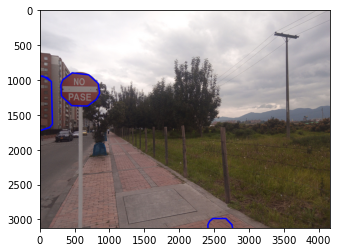

In [271]:
alpha=0.01
ima_aproximacion=ima.copy()
print("alpha usado= "+str(alpha))
print("")
for i in range(len(contours)):
    cnt=contours[i]
    epsilon = alpha*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    #Area del contorno
    area=cv2.contourArea(approx)
    #Longitud del contorno
    long=cv2.arcLength(approx,True)
    #Posición del centroide
    M = cv2.moments(approx)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    #dibujar contornos
    cv2.drawContours (ima_aproximacion, [approx], 0, (0, 0, 255), 20)
    
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")
    plt.imshow(ima_aproximacion)

### Mínimo rectangulo

Longitud lado largo 0= 354.0
Longitud Lado corto 0= 136.0
Relación entre lados 0= 2.6029411764705883

Longitud lado largo 1= 782.0
Longitud Lado corto 1= 179.0
Relación entre lados 1= 4.368715083798882

Longitud lado largo 2= 562.1281127929688
Longitud Lado corto 2= 482.1037292480469
Relación entre lados 2= 1.1659899699795697



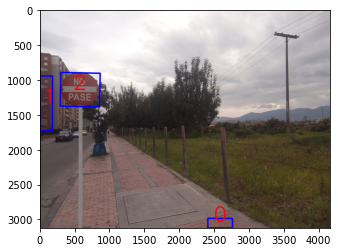

In [293]:
ima_min_rect=ima.copy()
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    #posición Centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    #Longitudes rectangulo
    a=cv2.arcLength(np.array([box[0],box[1]]),False)
    b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
    largo=np.max([a,b])
    corto=np.min([a,b])
    rel=largo/corto
    
    cv2.drawContours(ima_min_rect,[box],0,(0,0,255),20)
    cv2.putText(ima_min_rect,str(i),(cx-100,cy),2,10,(255,0,0),10)
    print("Longitud lado largo "+str(i)+"= "+str(largo))
    print("Longitud Lado corto "+str(i)+"= "+str(corto))
    print("Relación entre lados "+str(i)+"= "+str(rel))
    print("")
plt.imshow(ima_min_rect)